In [38]:
import pandas as pd
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import  mean_absolute_error
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

In [39]:
dataset = pd.read_csv('./datasets/final_dataset.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])

Text(0, 0.5, '# Hours')

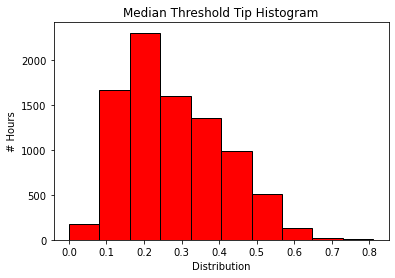

In [40]:
plt.hist(dataset['median_tip'], bins = 10, color = 'red', edgecolor = 'black')
plt.title('Median Threshold Tip Histogram')
plt.xlabel('Distribution')
plt.ylabel('# Hours')

Text(0, 0.5, '# Hours')

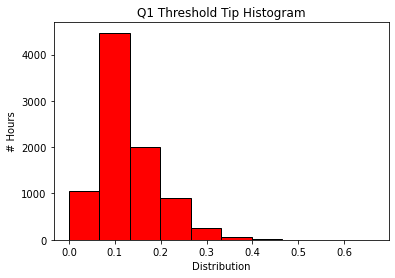

In [42]:
plt.hist(dataset['q1_tip'], bins = 10, color = 'red', edgecolor = 'black')
plt.title('Q1 Threshold Tip Histogram')
plt.xlabel('Distribution')
plt.ylabel('# Hours')

Text(0, 0.5, '# Hours')

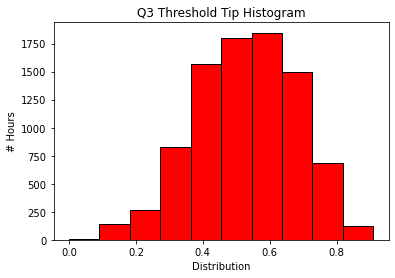

In [43]:
plt.hist(dataset['q3_tip'], bins = 10, color = 'red', edgecolor = 'black')
plt.title('Q3 Threshold Tip Histogram')
plt.xlabel('Distribution')
plt.ylabel('# Hours')

In [6]:
dataset

,base_fee,timestamp,blocks,gas_limit,gas_used,legacy_tx,sum_priority_fee_eth,tx,median_tip,q1_tip,...,mfers_sales_count,deadfellaz_floor_usd,deadfellaz_volume_usd,deadfellaz_sales_count,beeple_floor_usd,beeple_volume_usd,beeple_sales_count,clonex_floor_usd,clonex_volume_usd,clonex_sales_count
0,47.703934,2021-08-05 12:00:00,108,3187808029,2154963245,19619,36.405995,19976,0.296145,0.165969,...,0,0.0000,0.000000,0,0.0000,0.0,0,0.0000,0.00000,0
1,207.615140,2021-08-05 13:00:00,243,6910676231,3722322759,40617,66.263737,41797,0.318663,0.185114,...,0,0.0000,0.000000,0,0.0000,0.0,0,0.0000,0.00000,0
2,304.282774,2021-08-05 14:00:00,277,7698145312,3982474440,45948,82.869445,46939,0.505857,0.234593,...,0,0.0000,0.000000,0,0.0000,0.0,0,0.0000,0.00000,0
3,225.608906,2021-08-05 15:00:00,254,7075245729,3665086336,47237,64.957738,48827,0.221217,0.104981,...,0,0.0000,0.000000,0,0.0000,0.0,0,0.0000,0.00000,0
4,265.225009,2021-08-05 16:00:00,254,7107208896,3742906764,47726,80.700634,48625,0.391439,0.179006,...,0,0.0000,0.000000,0,0.0000,0.0,0,0.0000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,35.935752,2022-08-05 08:00:00,261,7827886307,4088857563,8684,13.980088,50513,0.184175,0.069670,...,41,1369.6116,29971.993278,18,28941.1975,0.0,0,11397.1251,313807.36638,19
8757,27.898762,2022-08-05 09:00:00,262,7859908518,4130183041,8863,15.294690,54094,0.162364,0.110703,...,41,1369.6116,29971.993278,18,28941.1975,0.0,0,11397.1251,313807.36638,19
8758,23.378548,2022-08-05 10:00:00,257,7710993163,4051538305,9403,18.812820,53906,0.156575,0.103242,...,41,1369.6116,29971.993278,18,28941.1975,0.0,0,11397.1251,313807.36638,19
8759,56.087637,2022-08-05 11:00:00,260,7799821832,4441484858,11701,22.762670,60688,0.236753,0.119655,...,41,1369.6116,29971.993278,18,28941.1975,0.0,0,11397.1251,313807.36638,19


In [7]:
dataset = dataset.drop(columns=['timestamp','fng_classification','date'])

dataset.columns

Index(['base_fee', 'blocks', 'gas_limit', 'gas_used', 'legacy_tx',
       'sum_priority_fee_eth', 'tx', 'median_tip', 'q1_tip', 'q3_tip',
       'eth_price', 'fng_value', 'ethereum_tvl', 'polygon_tvl', 'bsc_tvl',
       'polygon_base_fee', 'polygon_blocks', 'polygon_gas_limit',
       'polygon_gas_used', 'polygon_legacy_tx', 'polygon_sum_priority_fee_eth',
       'polygon_tx', 'polygon_median_tip', 'polygon_q1_tip', 'polygon_q3_tip',
       'bsc_blocks', 'bsc_gas_limit', 'bsc_gas_used',
       'bsc_hourly_median_fee_tx', 'bsc_tx', 'bayc_floor_usd',
       'bayc_volume_usd', 'bayc_sales_count', 'cp_floor_usd', 'cp_volume_usd',
       'cp_sales_count', 'mayc_floor_usd', 'mayc_volume_usd',
       'mayc_sales_count', 'agp_floor_usd', 'agp_volume_usd',
       'agp_sales_count', 'csabc_floor_usd', 'csabc_volume_usd',
       'csabc_sales_count', 'fabc_floor_usd', 'fabc_volume_usd',
       'fabc_sales_count', 'azuki_floor_usd', 'azuki_volume_usd',
       'azuki_sales_count', 'mbirds_floor_usd'

In [8]:
def reorder_dataset(dataset, n):
    
    ds = dataset.copy()
    columns = ds.columns
    for i in range (1,n+1):
        for column in columns:
            if column != 'median_tip':
                ds[column+'_'+str(i)] = np.nan

 

    for i in range (1,n+1):        
        for column in columns:
            if column != 'median_tip':
                ds[column+'_'+str(i)] = ds[column].shift(i)
            
    return ds

dataset_n1 = reorder_dataset(dataset,1)
dataset_n3 = reorder_dataset(dataset,3)
dataset_n5 = reorder_dataset(dataset,5)
dataset_n10 = reorder_dataset(dataset,10)
dataset_n24 = reorder_dataset(dataset,24)

/var/folders/v8/qbhfywjj29x_mwp_gsm98j900000gn/T/ipykernel_4720/3016634127.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ds[column+'_'+str(i)] = np.nan


In [9]:
columns = [x for x in dataset.columns if x != 'median_tip']

dataset_n1 = dataset_n1.drop(columns = columns)

dataset_n3 = dataset_n3.drop(columns = columns)

dataset_n5 = dataset_n5.drop(columns = columns)

dataset_n10 = dataset_n10.drop(columns = columns)

dataset_n24 = dataset_n24.drop(columns = columns)

In [10]:
#### Drop blocks without full history ####
dataset_n1 = dataset_n1.dropna()
dataset_n3 = dataset_n3.dropna()
dataset_n5 = dataset_n5.dropna()
dataset_n10 = dataset_n10.dropna()
dataset_n24 = dataset_n24.dropna()

In [11]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 30, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}
print(random_grid)

best_metric = -100
best_N = 0

steps = [('scaler', StandardScaler()), ('rf', RandomForestRegressor())]
pipeline = Pipeline(steps)

N = [1,3,5,10,24]
rf_results = []

for n in N:
    
    if n == 1:
        rf_df = dataset_n1
    elif n ==3:
        rf_df = dataset_n3
    elif n ==5:
        rf_df = dataset_n5
    elif n ==10:
        rf_df = dataset_n10
    elif n ==24:
        rf_df = dataset_n24



    X = rf_df.drop('median_tip', axis=1)
    y = rf_df['median_tip']
    tscv = TimeSeriesSplit(n_splits=3, test_size=math.floor(len(rf_df)*0.1), gap=n)
    rf_bayes = BayesSearchCV(pipeline, random_grid, n_iter = 10, cv = tscv, verbose=10, random_state=42, n_jobs = -1,scoring="neg_mean_absolute_error")
    rf_bayes.fit(X, y)
    print(n)
    print(rf_bayes.best_estimator_)
    print(rf_bayes.best_score_)
    rf_results.append(rf_bayes)
    if best_metric < rf_bayes.best_score_:
        rf = rf_bayes
        rf_specs = rf_bayes.best_estimator_[1]
        best_metric = rf_bayes.best_score_
        best_N = n
print("Best N and model: ", best_N, rf_bayes.best_estimator_[1])
print("Best metric: ", best_metric)
    

{'rf__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'rf__max_features': ['auto', 'sqrt'], 'rf__max_depth': [10, 12, 14, 16, 18, 21, 23, 25, 27, 30], 'rf__min_samples_split': [2, 5, 10], 'rf__min_samples_leaf': [1, 2, 4], 'rf__bootstrap': [True, False]}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 2/3; 1/1] START rf__bootstrap=False, rf__max_depth=25, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=500
[CV 1/3; 1/1] START rf__bootstrap=False, rf__max_depth=25, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=500
[CV 3/3; 1/1] START rf__bootstrap=False, rf__max_depth=25, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=500
[CV 1/3; 1/1] END rf__bootstrap=False, rf__max_depth=25, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=500;, score=-0.091 total time=  10.3s
[CV 2/3; 1/1] END rf__boot

In [12]:
best_metric

-0.051743901058391634

In [21]:
rf_specs

RandomForestRegressor(max_depth=27, min_samples_leaf=4, min_samples_split=5)

In [22]:
best_N

5

In [15]:
if best_N == 1:
    training = dataset_n1
    rf_final = rf_results[0]
elif best_N ==3:
    training = dataset_n3
    rf_final = rf_results[1]
elif best_N ==5:
    training = dataset_n5
    rf_final = rf_results[2]
elif best_N ==10:
    training = dataset_n10
    rf_final = rf_results[3]
elif best_N ==24:
    training = dataset_n24
    rf_final = rf_results[4]



X = training.drop('median_tip', axis=1)

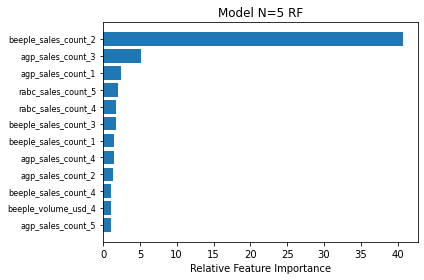

In [25]:
feature_importance = abs(rf_final.best_estimator_[1].feature_importances_)
total_feature_importance =  feature_importance.sum()
feature_importance = 100.0 * (feature_importance / total_feature_importance)
column_names_ids = np.argsort(feature_importance)
feature_importance = np.array([i for i in feature_importance if i>1])
column_names_ids = column_names_ids[:len(feature_importance)]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[column_names_ids], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.title('Model N='+str(best_N)+' RF')

plt.tight_layout()   
plt.show()

In [26]:
#### Real data validation ####
dataset_validation = pd.read_csv('./datasets/dataset_validation.csv')
dataset_validation = dataset_validation.drop(columns=['Unnamed: 0'])
dataset_validation

,base_fee,timestamp,blocks,gas_limit,gas_used,legacy_tx,sum_priority_fee_eth,tx,median_tip,q1_tip,...,mfers_sales_count,deadfellaz_floor_usd,deadfellaz_volume_usd,deadfellaz_sales_count,beeple_floor_usd,beeple_volume_usd,beeple_sales_count,clonex_floor_usd,clonex_volume_usd,clonex_sales_count
0,2.280913,2022-08-07 01:00:00,39,1169764903,688520770,887,1.663079,6582,0.529009,0.168829,...,24,1376.048000,15485.486578,10,28735.120000,0.0,0,13436.704000,104043.798720,7
1,15.432999,2022-08-07 02:00:00,237,7110027747,3880719039,7752,11.868786,45632,0.259681,0.143453,...,24,1376.048000,15485.486578,10,28735.120000,0.0,0,13436.704000,104043.798720,7
2,24.098700,2022-08-07 03:00:00,236,7080964616,3738681213,8183,15.676680,44685,0.213495,0.114983,...,24,1376.048000,15485.486578,10,28735.120000,0.0,0,13436.704000,104043.798720,7
3,20.704683,2022-08-07 04:00:00,259,7770467023,4057887078,10664,27.055056,51861,0.194821,0.118158,...,24,1376.048000,15485.486578,10,28735.120000,0.0,0,13436.704000,104043.798720,7
4,14.718397,2022-08-07 05:00:00,260,7799439368,4218450045,10480,11.841531,51113,0.168015,0.102764,...,24,1376.048000,15485.486578,10,28735.120000,0.0,0,13436.704000,104043.798720,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,72.111645,2022-09-01 02:00:00,262,7860700504,4377071552,6209,17.266260,45688,0.260117,0.149365,...,8,1040.413718,14744.637461,12,27915.435336,0.0,0,10886.242192,569498.519548,38
602,61.364488,2022-09-01 03:00:00,245,7350614227,3984931896,8060,17.113234,48005,0.204441,0.128885,...,8,1040.413718,14744.637461,12,27915.435336,0.0,0,10886.242192,569498.519548,38
603,45.194583,2022-09-01 04:00:00,241,7230584402,3824712180,8929,14.133103,40814,0.222156,0.109491,...,8,1040.413718,14744.637461,12,27915.435336,0.0,0,10886.242192,569498.519548,38
604,39.157729,2022-09-01 05:00:00,261,7831988695,4187495091,7087,15.891177,40512,0.241508,0.128553,...,8,1040.413718,14744.637461,12,27915.435336,0.0,0,10886.242192,569498.519548,38


In [27]:
dataset_validation = dataset_validation.drop(columns=['timestamp','fng_classification','date'])
columns = [x for x in dataset_validation.columns if x != 'median_tip']

n=best_N
dataset_validation = reorder_dataset(dataset_validation,n)
dataset_validation = dataset_validation.drop(columns = columns)

dataset_validation = dataset_validation.dropna()

/var/folders/v8/qbhfywjj29x_mwp_gsm98j900000gn/T/ipykernel_4720/3016634127.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ds[column+'_'+str(i)] = np.nan


In [28]:
y_validation = dataset_validation['median_tip']
X_validation = dataset_validation.drop('median_tip', axis=1)

y_val_pred_rf = rf_final.predict(X_validation)
y_val_pred_rf = np.maximum(y_val_pred_rf, 0.)

print('mean_absolute_error RF: ', mean_absolute_error(y_validation, y_val_pred_rf))

mean_absolute_error RF:  0.029537181857392476


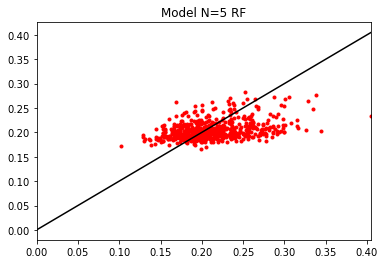

In [29]:
line=np.linspace(0,np.max(y_validation),len(y_validation)) 

plt.plot(y_validation,y_val_pred_rf,'r.') # x vs y
plt.plot(line,line,'k-') # identity line

plt.xlim(0,np.max(y_validation))
plt.title('Model N='+str(best_N)+' RF')


plt.show()

In [30]:
y_val_array = np.array(y_validation)
lower_values=0
for i in range(0,len(y_val_array)):
    if y_val_pred_rf[i] <= y_val_array[i]:
        lower_values=lower_values+1

print("Amount of predicted min tip that wouldn't be enough to go through:" , lower_values)
print("Percetage of predicted min tip that wouldn't be enough to go through: ", (lower_values/len(y_val_array)*100), "%")

Amount of predicted min tip that wouldn't be enough to go through: 325
Percetage of predicted min tip that wouldn't be enough to go through:  54.0765391014975 %


In [31]:
errors_validation = []
for i in range(0,len(y_val_array)):
    if abs(y_val_pred_rf[i] - y_val_array[i]) <= 100:
        errors_validation.append(y_val_pred_rf[i] - y_val_array[i])

erros_validation = np.array(errors_validation)

Text(0, 0.5, '# blocks')

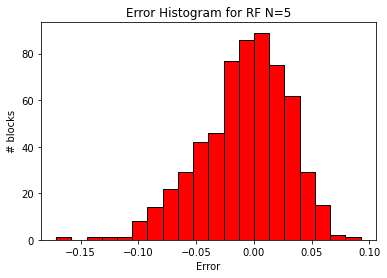

In [32]:
plt.hist(errors_validation, bins = 20, color = 'red', edgecolor = 'black')
plt.title('Error Histogram for RF N='+str(best_N)+'')
plt.xlabel('Error')
plt.ylabel('# blocks')

In [33]:
data = {'real_y': y_val_array, 'rf_y': y_val_pred_rf}
rf_results = pd.DataFrame(data).to_csv("rf_results.csv")